In [24]:
import cv2
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

dataFolder = 'new_training_data/'

lines = []
with open(dataFolder+'driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = dataFolder+'IMG/'+filename
        image = cv2.imread(current_path)
        images.append(image)
        offset = 0.2  # offset for left image and right image, if left image, steering angle will be added by offset
        measurement = float(line[3]) + (i==1)*offset - (i==2)*offset
        measurements.append(measurement)

        ## data augmentation by flipping
        images.append(np.fliplr(image))
        measurements.append(-measurement)

Total samples: 23934


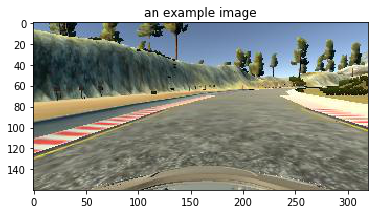

[0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.1, 0.1, 0.1, -0.1, -0.30000000000000004, 0.30000000000000004, -0.3, 0.3, -0.09999999999999998, 0.09999999999999998, -0.5, 0.5, -0.45, 0.45, -0.25, 0.25, -0.65, 0.65, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.25, 0.25, -0.04999999999999999, 0.04999999999999999, -0.45, 0.45, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.1, 0.1, 0.1, -0.1, -0.30000000000000004, 0.30000000000000004, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.15, 0.15, 0.05000000000000002, -0.05000000000000002, -0.35, 0.35, -0.35, 0.35, -0.14999999999999997, 0.14999999999999997, -0.55, 0.55, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.2, 0.2, 0.0, -0.0, -0.4, 0.4, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.25, 0.25, -0.04999999999999999, 0.04999999999999999, -0.45, 0.45, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.25, 0.25, -0.04999999999999999, 0.04999999999999999, -0.45, 0.45, 0.0, -0.0, 0.2, -0.2, -0.2, 0.2, -0.1, 0.1, 0.1, -0.1, -0.30000000000000004, 0.30000000000

In [26]:
# show summary and example images
print("Total samples: {}".format(len(measurements)))

plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.title("an example image")
plt.show()

print(measurements)

In [28]:
X_train = np.array(images)
y_train = np.array(measurements)


In [31]:
# just a scaffold of a simple test model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Cropping2D

model = Sequential()
model.add(Cropping2D(cropping=((50, 20), (0, 0)),  input_shape=(160, 320, 3)))
model.add(Lambda(lambda x: x / 255.0 - 0.5))

model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)
model.save("model.h5")
#notes: to use this model in simulator, use run the provided drive.py like this in command line: 
#       python drive.py model.h5
#      then launch the simulator, and then select autonomous mode

/home/junhua/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 19147 samples, validate on 4787 samples
Epoch 1/5
19147/19147 [==============================] - 12s 623us/step - loss: 0.8403 - val_loss: 1.6850
Epoch 2/5
19147/19147 [==============================] - 20s 1ms/step - loss: 1.0293 - val_loss: 0.6818
Epoch 3/5
19147/19147 [==============================] - 40s 2ms/step - loss: 0.8714 - val_loss: 0.6774
Epoch 4/5
19147/19147 [==============================] - 18s 928us/step - loss: 1.5534 - val_loss: 0.7621
Epoch 5/5
19147/19147 [==============================] - 12s 640us/step - loss: 1.0394 - val_loss: 0.8054


OSError: Unable to create file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')